### Oppgave 1

In [1]:
%matplotlib inline

from numpy import *
from numpy.linalg import solve, norm
from matplotlib.pyplot import *
from math import factorial
newparams = {'figure.figsize': (8.0, 4.0), 'axes.grid': True,
             'lines.markersize': 8, 'lines.linewidth': 2,
             'font.size': 14}
rcParams.update(newparams)

In [2]:
def simpson(f, a, b, m=10):
# Find an approximation to an integral by the composite Simpson's method:
# Input:  
#   f:    integrand
#   a, b: integration interval
#   m:    number of subintervals
# Output: The approximation to the integral
    n = 2*m
    x_noder = linspace(a, b, n+1)       # equidistributed nodes from a to b 
    h = (b-a)/n                         # stepsize
    S1 = f(x_noder[0]) + f(x_noder[n])  # S1 = f(x_0)+f(x_n)
    S2 = sum(f(x_noder[1:n:2]))         # S2 = f(x_1)+f(x_3)+...+f(x_m)
    S3 = sum(f(x_noder[2:n-1:2]))       # S3 = f(x_2)+f(x_4)+...+f(x_{m-1})
    S = h*(S1 + 4*S2 + 2*S3)/3
    return S

In [3]:
def create_convergence_plot_data(f, I, a, b, m=1, n=10):
    """
    Creates a list of tuples of the form (h, Q, E, p, C).
        f : Integrand
        I : Exact value of definite integral
        a : Start node
        b : End node
        m : Number of intervals to pass to Q(f, a, b, m)
        n : Number of iterations
    """
    # Initial setup
    h = (b-a)/(2*m)
    p = 0
    quadratures = []
    steps = []
    errors = []
    orders = [nan]
    constants = [nan]

    for _ in range(n):
        S = simpson(f, a, b, m)
        E = abs(I - S)
        h = (b-a) / (2*m)
        quadratures.append(S)
        steps.append(h)
        errors.append(E)
        m *= 2

    # Calculate p and c
    for e_0, e_1, h_0, h_1 in zip(errors, errors[1:], steps, steps[1:]):
        p = log(e_1/e_0)/log(h_1/h_0)
        C = e_1/h_1**p
        orders.append(p)
        constants.append(C)
    
    return list(zip(steps, quadratures, errors, orders, constants))

| Step size  | Quadrature |   Error    |   Order    |  Constant  |
| 1.0000e+00 | 7.8347e-01 | 4.7709e-02 |    nan     |    nan     |
| 5.0000e-01 | 7.3913e-01 | 3.3717e-03 | 3.8227e+00 | 4.7709e-02 |
| 2.5000e-01 | 7.3598e-01 | 2.1762e-04 | 3.9536e+00 | 5.2240e-02 |
| 1.2500e-01 | 7.3577e-01 | 1.3712e-05 | 3.9883e+00 | 5.4811e-02 |
| 6.2500e-02 | 7.3576e-01 | 8.5877e-07 | 3.9971e+00 | 5.5823e-02 |
| 3.1250e-02 | 7.3576e-01 | 5.3701e-08 | 3.9993e+00 | 5.6166e-02 |
| 1.5625e-02 | 7.3576e-01 | 3.3567e-09 | 3.9998e+00 | 5.6273e-02 |
| 7.8125e-03 | 7.3576e-01 | 2.0980e-10 | 4.0000e+00 | 5.6306e-02 |
| 3.9062e-03 | 7.3576e-01 | 1.3113e-11 | 4.0000e+00 | 5.6317e-02 |
| 1.9531e-03 | 7.3576e-01 | 8.1946e-13 | 4.0001e+00 | 5.6364e-02 |


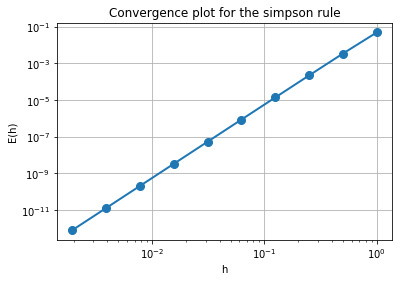

In [4]:
def f(x):
    return x*exp(x)

# Exact result
I = 2/exp(1)

results = create_convergence_plot_data(f, I, -1, 1, m=1)
steps = [data[0] for data in results]
errors = [data[2] for data in results]

# Printing
header = "|{:^12}|{:^12}|{:^12}|{:^12}|{:^12}|".format("Step size", "Quadrature", "Error", "Order", 'Constant')
print(header)
print('='*len(header))
for data in results:
    print("|{:^12.4e}|{:^12.4e}|{:^12.4e}|{:^12.4e}|{:^12.4e}|".format(*data))
    
# Convergence plot
clf()
loglog(steps, errors, 'o-')
xlabel('h')
ylabel('E(h)')
title('Convergence plot for the simpson rule')
grid(True)

| Step size  | Quadrature |   Error    |   Order    |  Constant  |
| 1.0000e+00 | 1.3333e+00 | 4.4217e-01 |    nan     |    nan     |
| 5.0000e-01 | 1.6354e+00 | 1.4010e-01 | 1.6582e+00 | 4.4217e-01 |
| 2.5000e-01 | 1.7289e+00 | 4.6639e-02 | 1.5868e+00 | 4.2082e-01 |
| 1.2500e-01 | 1.7595e+00 | 1.6041e-02 | 1.5398e+00 | 3.9426e-01 |
| 6.2500e-02 | 1.7699e+00 | 5.6006e-03 | 1.5181e+00 | 3.7692e-01 |
| 3.1250e-02 | 1.7735e+00 | 1.9685e-03 | 1.5085e+00 | 3.6701e-01 |
| 1.5625e-02 | 1.7748e+00 | 6.9397e-04 | 1.5041e+00 | 3.6144e-01 |
| 7.8125e-03 | 1.7753e+00 | 2.4501e-04 | 1.5020e+00 | 3.5831e-01 |
| 3.9062e-03 | 1.7754e+00 | 8.6566e-05 | 1.5010e+00 | 3.5654e-01 |
| 1.9531e-03 | 1.7755e+00 | 3.0595e-05 | 1.5005e+00 | 3.5555e-01 |


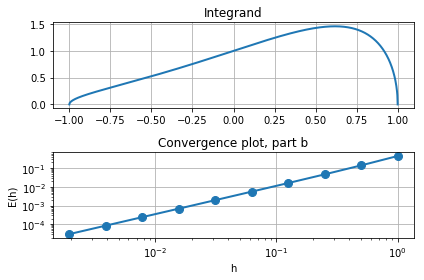

In [5]:
def f(x):
    return (1 - x**2)**0.5 * exp(x)

subplot (2, 1, 1)
x = linspace(-1, 1, 1000)
y = f(x)
title('Integrand')
plot(x, y)

subplot (2, 1, 2)
# Exact result
I = 1.7754996892121809469

results = create_convergence_plot_data(f, I, -1, 1, m=1)
steps = [data[0] for data in results]
errors = [data[2] for data in results]

# Printing
header = "|{:^12}|{:^12}|{:^12}|{:^12}|{:^12}|".format("Step size", "Quadrature", "Error", "Order", 'Constant')
print(header)
print('='*len(header))
for data in results:
    print("|{:^12.4e}|{:^12.4e}|{:^12.4e}|{:^12.4e}|{:^12.4e}|".format(*data))
    
# Convergence plot
loglog(steps, errors, 'o-')
xlabel('h')
ylabel('E(h)')
title('Convergence plot, part b')
grid(True);
tight_layout()

##### Kommentar
I Simpsons metode vil det å doble antall delintervaller svare til å halvere steglengden.
Antagelsen om at felien kan skrives på formen C * h**p holder ikke

### Oppgave 3

In [6]:
def newton(f, df, x0, tol=1.e-8, max_iter=30):
    # Solve f(x)=0 by Newtons method
    # The output of each iteration is printed
    # Input:
    #   f, df:   The function f and its derivate f'.
    #   x0:  Initial values
    #   tol: The tolerance
    # Output:
    #   The root and the number of iterations
    x = x0
    print('k ={:3d}, x = {:18.15f}, f(x) = {:10.3e}'.format(0, x, f(x)))
    for k in range(max_iter):
        fx = f(x)
        if abs(fx) < tol:           # Accept the solution 
            break 
        x = x - fx/df(x)            # Newton-iteration
        print('k ={:3d}, x = {:18.15f}, f(x) = {:10.3e}'.format(k+1, x, f(x)))
    return x, k+1

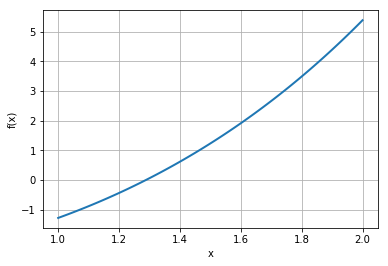

In [7]:
def f(x):
    return exp(x) + x**2 - x - 4

def df(x):
    return exp(x) + 2*x - 1

x = linspace(1, 2, 100)
xlabel("x")
ylabel("f(x)")
plot(x, f(x));

In [8]:
newton(f, df, 1.3);

k =  0, x =  1.300000000000000, f(x) =  5.930e-02
k =  1, x =  1.288746758560088, f(x) =  3.581e-04
k =  2, x =  1.288677969382023, f(x) =  1.332e-08
k =  3, x =  1.288677966823868, f(x) = -4.441e-16


In [9]:
def fixpoint(g, x0, tol=1.e-8, max_iter=30):
    # Solve x=g(x) by fixed point iterations
    # The output of each iteration is printed
    # Input:
    #   g:   The function g(x)
    #   x0:  Initial values
    #   tol: The tolerance
    # Output:
    #   The root and the number of iterations
    x = x0
    print('k ={:3d}, x = {:14.10f}'.format(0, x))  
    for k in range(max_iter):        
        x_old = x                        # Store old values for error estimation 
        x = g(x)                         # The iteration
        err = abs(x-x_old)               # Error estimate
        print('k ={:3d}, x = {:14.10f}'.format(k+1, x))
        if err < tol:          # The solution is accepted 
            break
    return x, k+1

In [10]:
x0 = 1.5

def g_i(x):
    return log(4 + x - x**2)

def g_ii(x):
    return sqrt(-exp(x) + x + 4)

def g_iii(x):
    return exp(x) + x**2 - 4

print("\nFunction: 'i'")
fixpoint(g_i, 1.5)

print("\nFunction: 'ii'")
fixpoint(g_ii, 1.5)

print("\nFunction: 'iii'")
fixpoint(g_iii, 1.5);


Function: 'i'
k =  0, x =   1.5000000000
k =  1, x =   1.1786549963
k =  2, x =   1.3322149248
k =  3, x =   1.2690350905
k =  4, x =   1.2970764687
k =  5, x =   1.2850003170
k =  6, x =   1.2902719159
k =  7, x =   1.2879840175
k =  8, x =   1.2889795000
k =  9, x =   1.2885468343
k = 10, x =   1.2887349735
k = 11, x =   1.2886531806
k = 12, x =   1.2886887430
k = 13, x =   1.2886732816
k = 14, x =   1.2886800038
k = 15, x =   1.2886770812
k = 16, x =   1.2886783519
k = 17, x =   1.2886777994
k = 18, x =   1.2886780396
k = 19, x =   1.2886779352
k = 20, x =   1.2886779806
k = 21, x =   1.2886779608
k = 22, x =   1.2886779694

Function: 'ii'
k =  0, x =   1.5000000000
k =  1, x =   1.0091139329
k =  2, x =   1.5053054929
k =  3, x =   0.9998878264
k =  4, x =   1.5105995169
k =  5, x =   0.9905322092
k =  6, x =   1.5158710552
k =  7, x =   0.9810634053
k =  8, x =   1.5211088914
k =  9, x =   0.9714992449
k = 10, x =   1.5263017049
k = 11, x =   0.9618589916
k = 12, x =   1.53143817

C:\Users\Patrik\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


##### Kommentar
Vi ser at funksjon i) er den eneste som konvergerer.

### Oppgave 5

In [11]:
def newton_system(f, jac, x0, tol = 1.e-10, max_iter=20):
    x = x0
    print('k ={:3d}, x = '.format(0), x)
    for k in range(max_iter):
        fx = f(x)
        if norm(fx, inf) < tol:          # The solution is accepted. 
            break
        Jx = jac(x)
        delta = solve(Jx, -fx) 
        x = x + delta            
        print('k ={:3d}, x = '.format(k+1), x)
    return x, k

In [12]:
def f(x):               
    y = array([
        x[0]**2 + x[1]**2 - 4, 
        x[0] * x[1] - 1
    ])
    return y

def jac(x):
    J = array([[2*x[0], 2*x[1]],
               [x[1], x[0]]])
    return J

x0 = array([2.0, 0.0])  
max_iter = 20
x, nit = newton_system(f, jac, x0, tol = 1.e-12, max_iter = max_iter) 

k =  0, x =  [2. 0.]
k =  1, x =  [2.  0.5]
k =  2, x =  [1.93333333 0.51666667]
k =  3, x =  [1.93185274 0.51763705]
k =  4, x =  [1.93185165 0.51763809]
k =  5, x =  [1.93185165 0.51763809]


In [13]:
def f(x):               
    y = array([
        x[0]**2 + x[1]**2 - 2, 
        x[0] * x[1] - 1
    ])
    return y

def jac(x):
    J = array([[2*x[0], 2*x[1]],
               [x[1], x[0]]])
    return J

x0 = array([2.0, 0.0])  
max_iter = 20
x, nit = newton_system(f, jac, x0, tol = 1.e-12, max_iter = max_iter) 

k =  0, x =  [2. 0.]
k =  1, x =  [1.5 0.5]
k =  2, x =  [1.25 0.75]
k =  3, x =  [1.125 0.875]
k =  4, x =  [1.0625 0.9375]
k =  5, x =  [1.03125 0.96875]
k =  6, x =  [1.015625 0.984375]
k =  7, x =  [1.0078125 0.9921875]
k =  8, x =  [1.00390625 0.99609375]
k =  9, x =  [1.00195312 0.99804688]
k = 10, x =  [1.00097656 0.99902344]
k = 11, x =  [1.00048828 0.99951172]
k = 12, x =  [1.00024414 0.99975586]
k = 13, x =  [1.00012207 0.99987793]
k = 14, x =  [1.00006104 0.99993896]
k = 15, x =  [1.00003052 0.99996948]
k = 16, x =  [1.00001526 0.99998474]
k = 17, x =  [1.00000763 0.99999237]
k = 18, x =  [1.00000381 0.99999619]
k = 19, x =  [1.00000191 0.99999809]
k = 20, x =  [1.00000095 0.99999905]
